In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

# Problem 1

Complete the function `poisson_square` by implementing the finite difference method given in the lab. Use `scipy.sparse.linalg.spsolve` to solve the linear system. Use your function to solve the boundary value problem:

\begin{align}
	\begin{split}
	\Delta u = 0, &{}\quad x \in [0,1]\times [0,1],\\
	u(x,y) = x^3, &{}\quad (x,y) \in \partial ([0,1]\times [0,1]).
	\end{split}
	\label{poisson2d:laplace}
\end{align}

Use $n=100$ subintervals for both $x$ and $y$. Plot the solution as a 3D surface.

In [3]:
def poisson_square(a,b,c,d,f,g,n):
    """Computes the finite difference method for the Poisson equation boundary-value
    problem on a square:
        
        u_xx + u_yy = f on R = [a,b]×[c,d]
        u = g on ∂R
    
    where (b-a) = (d-c).
        
    Parameters:
        a (float): left-hand boundary for x
        b (float): right-hand boundary for x
        c (float): lower boundary for y
        d (float): uppder boundary for y
        f (function): right-hand side of the PDE
        g (function): boundary condition
        n (int): number of subintervals
    Returns:
        U (ndarray of shape (n+1,n+1)): approximate solution
    """
    x, h = np.linspace(a, b, n + 1, retstep = True) # Initialize points for x and y
    y = np.linspace(c, d, n + 1)
    
    I = np.eye(n - 1) # Construct T 
    T = sp.diags([1, -4, 1], [-1, 0, 1], shape = (n - 1, n - 1))
    
    p = []
    for i in range(1, n): # Construct the vector p
        pi = np.zeros(n - 1)
        pi[0] = g(x[0], y[i])
        pi[-1] = g(x[-1], y[i])
        p.append(pi)
    p = np.concatenate(p)
    p = p/(h**2)
        
    q = np.zeros_like(p) # Construct the vector q
    q1 = np.array([g(xi, y[0])/(h**2) for xi in x[1:-1]])
    q[:len(q1)] = q1
    q_n1 = np.array([g(xi, y[-1])/(h**2) for xi in x[1:-1]])
    q[len(q) - len(q_n1):] = q_n1
    
    f_vec = np.array([f(xi, yi) for yi in y[1:n] for xi in x[1:n]]) # Construct the vector f 
    
    A = sp.block_diag([T]*(n-1))/(h**2) # Construct the matrix A 
    temp = sp.diags([1, 1], [-n + 1, n - 1], shape = ((n - 1)**2, (n - 1)**2))/(h**2)
    A = A + temp
    
    U = sp.linalg.spsolve(A.tocsr(), f_vec - p - q) # Solve the system for the solution 
    
    return U

<IPython.core.display.Javascript object>


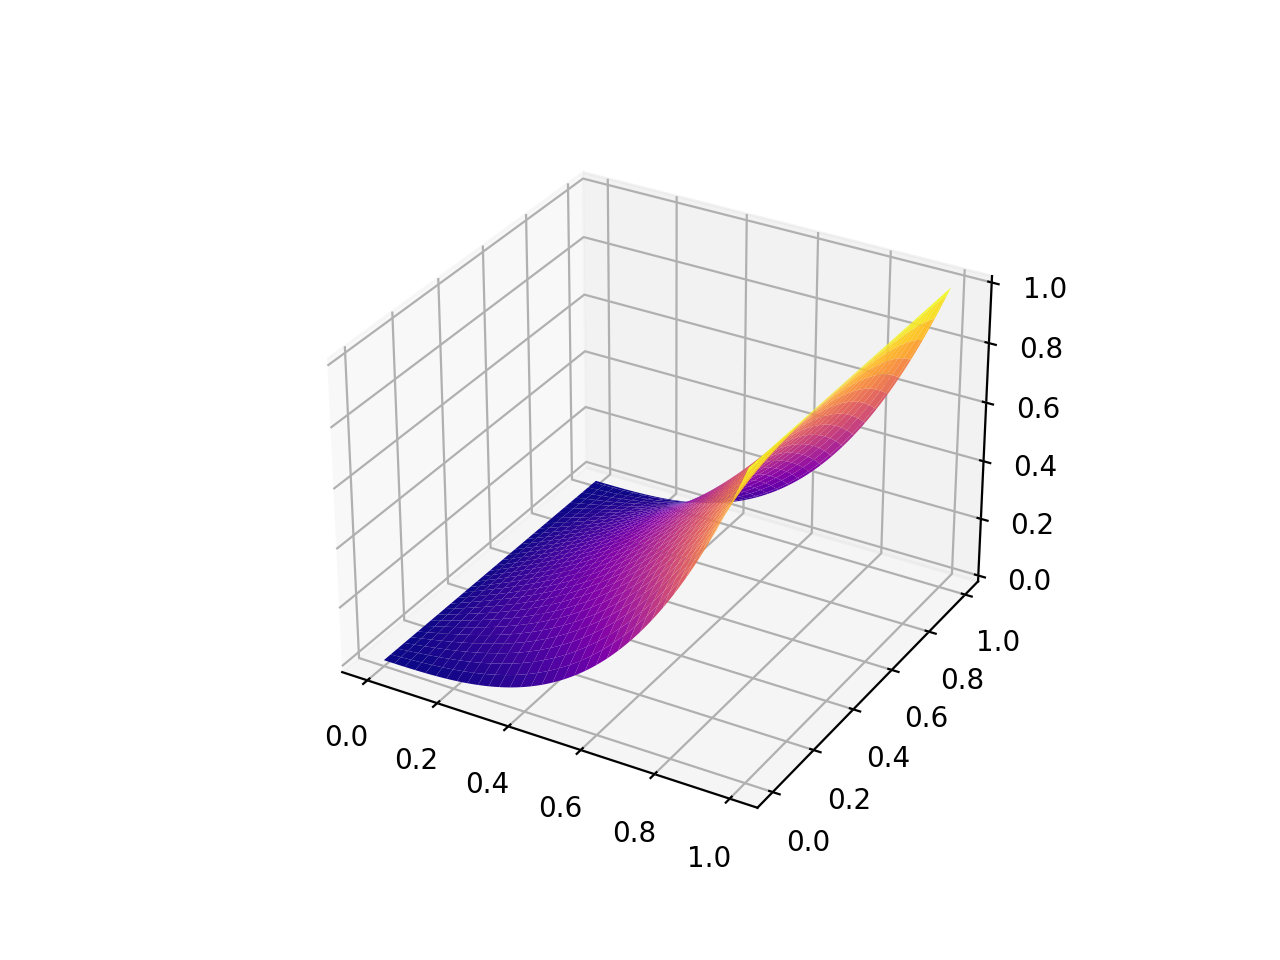

In [27]:
n = 100 # Initialize values to pass into the function for problem 1 
g = lambda x, y: x**3
sol = poisson_square(0, 1, 0, 1, lambda x, y: x*0, g, n)
sol = sol.reshape((n - 1, n - 1)) # Re shape the solution 

x = np.linspace(0, 1, n + 1) # Get x and y values for plotting 
y = np.linspace(0, 1, n + 1)
X, Y = np.meshgrid(x, y)

tempU = g(X, Y) # Add the boundary conditions 
tempU[1:-1, 1:-1] = sol

fig = plt.figure() # Plot the solution 
ax = fig.add_subplot(111, projection = "3d")

ax.plot_surface(X, Y, tempU, cmap = "plasma")
plt.show()

# Problem 2

Solve 

\begin{align}
	\begin{split}
	\Delta V = -\rho(x,y), &{}\quad x \in [-2,2]\times [-2,2],\\
	u(x,y) = 0, &{}\quad (x,y) \in \partial ([-2,2]\times [-2,2]).
	\end{split}
	\label{poisson2d:source}
\end{align}

for the electric potential $V.$ Use the source function defined above, such that $\rho(x,y) = \text{source}(x,y)$. Use $n=100$ subintervals for $x$ and $y$. Use the provided code to plot your solution.

<IPython.core.display.Javascript object>


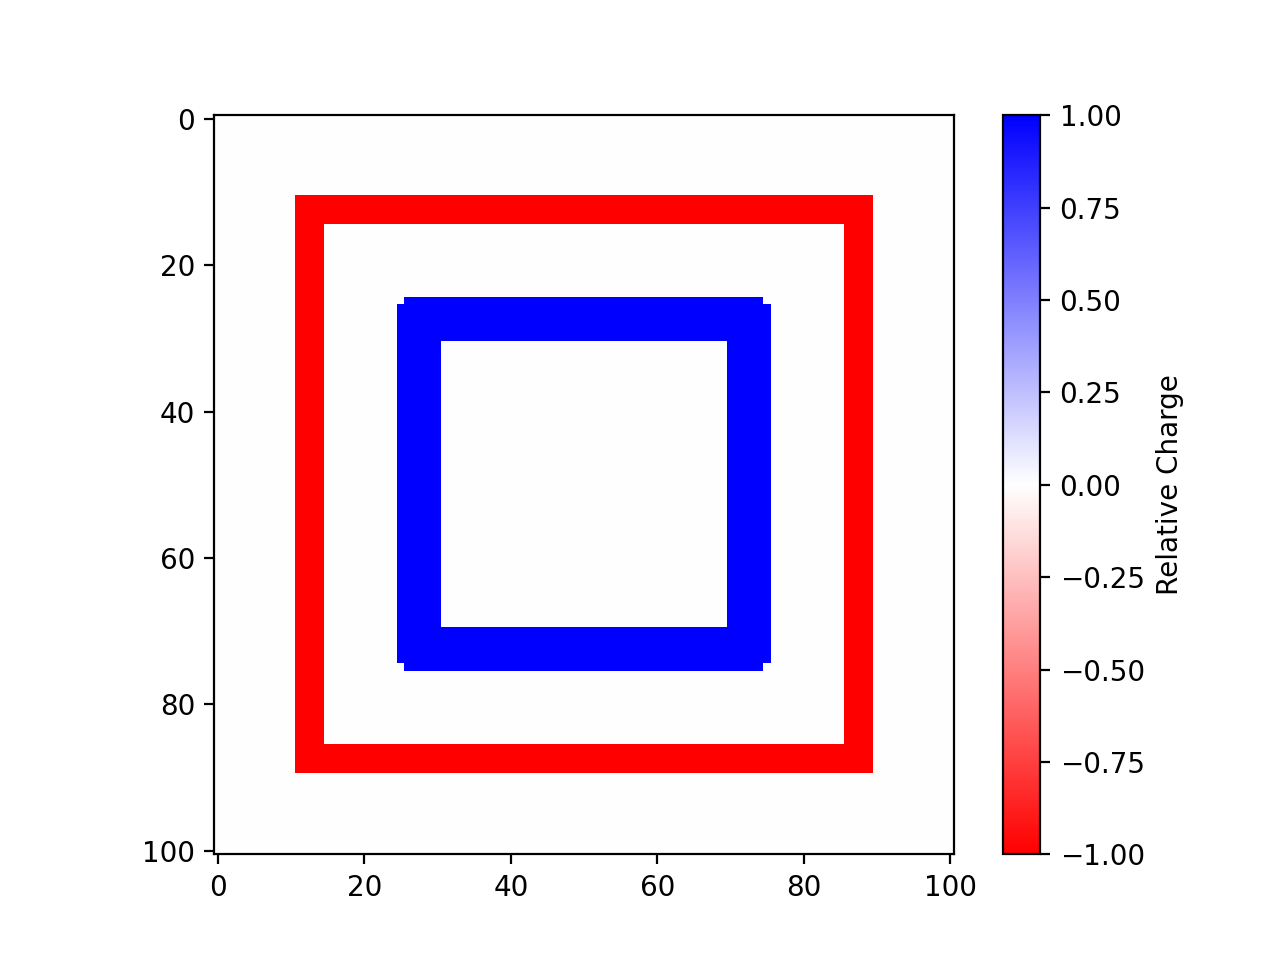

In [28]:
import matplotlib.colors as mcolors

def source(X,Y):
    """
    Takes arbitrary arrays of coordinates X and Y and returns an array of the same shape
    representing the charge density of nested charged squares
    """
    src = np.zeros(X.shape)
    src[ np.logical_or(np.logical_and( np.logical_or(abs(X-1.5) < .1,abs(X+1.5) < .1) ,abs(Y) <  1.6),
    np.logical_and( np.logical_or(abs(Y-1.5) < .1,abs(Y+1.5) < .1) ,abs(X) <  1.6))] = 1
    
    src[ np.logical_or(np.logical_and( np.logical_or(abs(X-0.9) < .1,abs(X+0.9) < .1) ,abs(Y) <  1.0),
    np.logical_and( np.logical_or(abs(Y-0.9) < .1,abs(Y+0.9) < .1) ,abs(X) <  1.0))] = -1
    return -1*src
    
#Generate a color dictionary for use with LinearSegmentedColormap
#that places red and blue at the min and max values of data
#and white when data is zero
def genDict(data):
    zero = 1/(1 - np.max(data)/np.min(data))
    cdict = {
    'red': [(0.0, 1.0, 1.0),(zero, 1.0, 1.0),(1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0),(zero, 1.0, 1.0),(1.0, 0.0, 0.0)],
    'blue': [(0.0, 0.0, 0.0),(zero, 1.0, 1.0),(1.0, 1.0, 1.0)]
    }
    return cdict

a1 = -2.
b1 = 2.
c1 = -2.
d1 = 2.
n = 100
X = np.linspace(a1,b1,n + 1)
Y = np.linspace(c1,d1,n + 1)
X,Y = np.meshgrid(X,Y)
plt.figure()
plt.imshow(source(X,Y),cmap = mcolors.LinearSegmentedColormap('cmap', genDict(source(X,Y))))
plt.colorbar(label="Relative Charge")
plt.show()

<IPython.core.display.Javascript object>


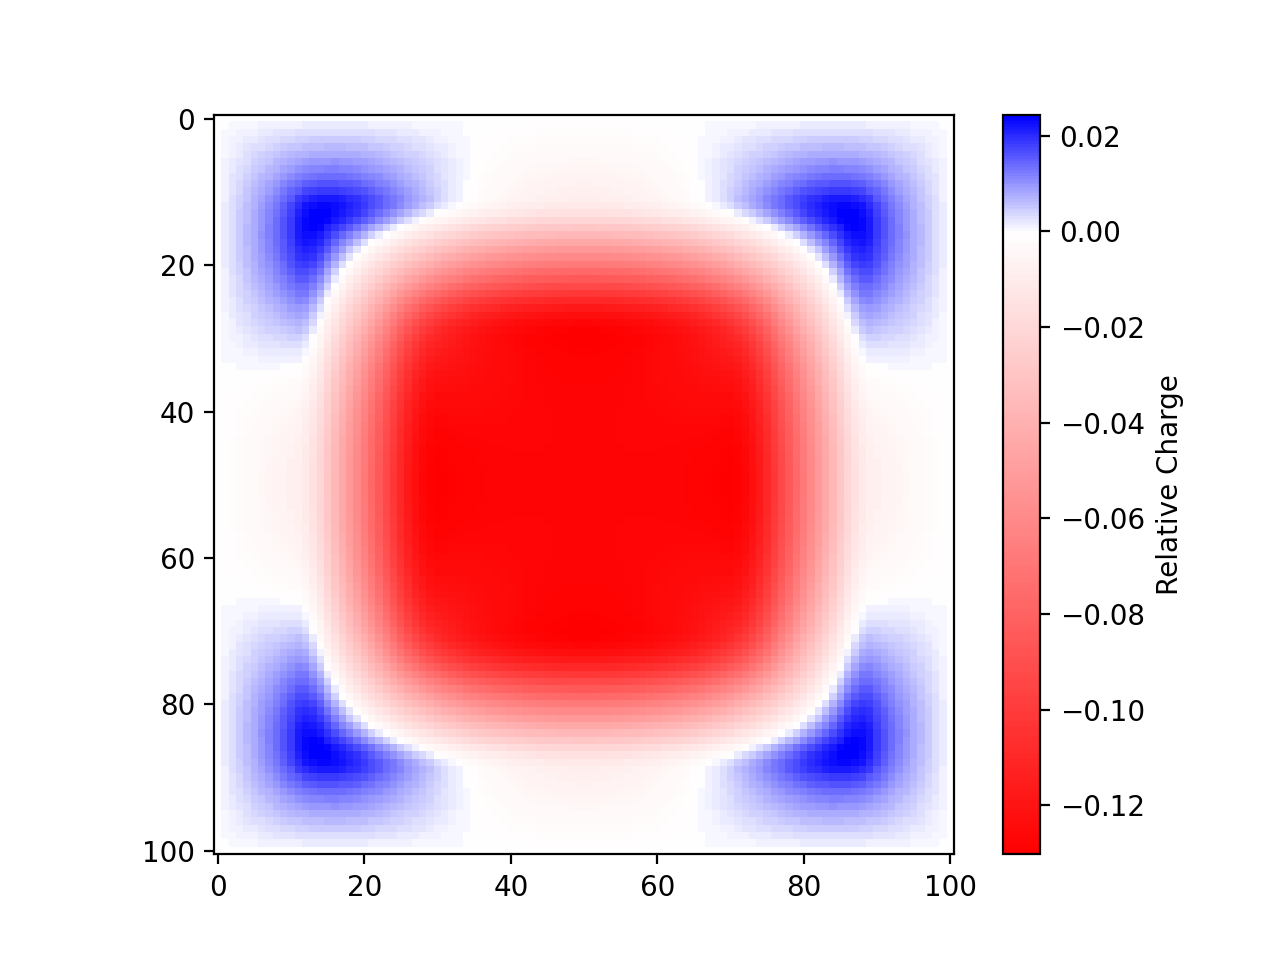

In [29]:
g = lambda x, y: x*0
sol = poisson_square(a1, b1, c1, d1, source, g, n)
sol = sol.reshape((n - 1, n - 1))

tempU = g(X, Y)
tempU[1:-1, 1:-1] = sol

plt.figure()
plt.imshow(tempU,cmap = mcolors.LinearSegmentedColormap('cmap', genDict(tempU)))
plt.colorbar(label="Relative Charge")
plt.show()